<a href="https://colab.research.google.com/github/Swayamprakashpatel/Sol_ME/blob/main/Sol_ME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = '/content/Data_FP.csv'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data
 
#df.fillna('&',inplace=True)
df.drop('DRUG', axis = 1, inplace = True)
df.drop('CARRIER', axis = 1, inplace = True)
print(df.shape)
df.head()
df.dtypes
#df.columns[df.isna().any()].tolist()
dataset = df.values


(1873, 1763)


In [68]:
X = dataset[:,0:1762]

#Y = dataset[:,1762:1763]
# Run this for labeled data
Y = dataset[:,1762:1763]

#Y = np.log(Y) 
#print(X, X.shape,X.dtype)
#print(Y, Y.shape, Y.dtype)
print(Y)

[[  3.03]
 [  2.83]
 [  1.27]
 ...
 [159.08]
 [ 66.01]
 [  8.58]]


In [73]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.4,random_state = 10 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 10)
import numpy as np
 
X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.int64)
Y_val = np.asarray(Y_val).astype(np.int64)
Y_test = np.asarray(Y_test).astype(np.int64)
 
filepath = '/content/drive/My Drive/SOLModel.hdf5'
 
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=75, verbose =1)]
output_nodes = Y.shape[1]
print(output_nodes)


1


Epoch 1/2000
36/36 [==============================] - ETA: 0s - loss: 159340848.0000 - root_mean_squared_error: 12623.0283
Epoch 1: val_root_mean_squared_error improved from inf to 138.68227, saving model to /content/drive/My Drive/SOLModel.hdf5
36/36 [==============================] - 3s 63ms/step - loss: 159340848.0000 - root_mean_squared_error: 12623.0283 - val_loss: 19232.7695 - val_root_mean_squared_error: 138.6823
Epoch 2/2000
35/36 [============================>.] - ETA: 0s - loss: 9333.6016 - root_mean_squared_error: 96.6106
Epoch 2: val_root_mean_squared_error improved from 138.68227 to 97.55922, saving model to /content/drive/My Drive/SOLModel.hdf5
36/36 [==============================] - 2s 57ms/step - loss: 9322.4092 - root_mean_squared_error: 96.5526 - val_loss: 9517.8008 - val_root_mean_squared_error: 97.5592
Epoch 3/2000
35/36 [============================>.] - ETA: 0s - loss: 7177.6958 - root_mean_squared_error: 84.7213
Epoch 3: val_root_mean_squared_error improved from

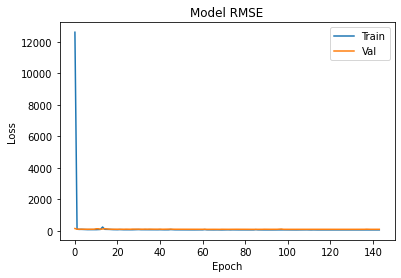

Training RMSE is
50.83056640625
Validation RMSE is
86.60308837890625
Training loss is
2583.74658203125
Validation loss is
7500.0947265625


In [74]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1512, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(1512, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='linear')])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X_train, Y_train, epochs= 2000, callbacks=[checkpoint],validation_data=(X_val, Y_val), batch_size= None)
model.evaluate(X_test, Y_test)
 
# Error Graph

plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
 

train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)

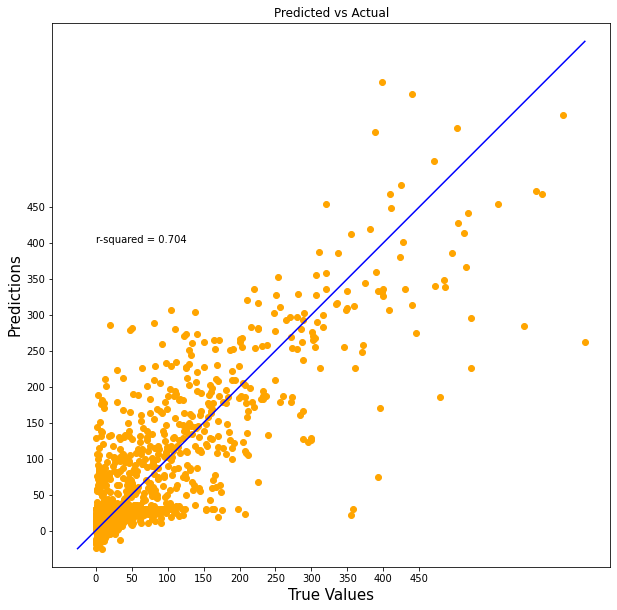

In [57]:
from sklearn.metrics import r2_score
true_value = Y
predicted_value = model.predict(X)

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='orange')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Predicted vs Actual')
plt.annotate("r-squared = {:.3f}".format(r2_score(true_value, predicted_value)), (1,400), )
plt.xticks( range(0,500,50) )
plt.yticks( range(0,500,50) )
plt.show()

In [ ]:
#@title Insert PubChem Fingerprint of Drug and Carrier (Oil, Surfactant, Cosurfactant)
!pip install pubchempy
import tensorflow as tf
import pandas as pd 
import numpy as np 
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1jN7P3FFzekgqeEXPsL8p-pTxB_fdOmFh',
                                    dest_path='/content/sample_data/Sol_ME.hdf5',
                                    unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile= True)


Drug_CID =  3672#@param {type:"number"}
Excipient_CID =  5284448#@param {type:"number"}


CID_D = pcp.Compound.from_cid(Drug_CID)
CID_E = pcp.Compound.from_cid(Excipient_CID)

FPD = CID_D.cactvs_fingerprint
FPE = CID_E.cactvs_fingerprint
List1 = list(FPD)
List2 = list(FPE)
List = List1 + List2
 
import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))
 
#@title RUN FOR PREDICTION
 
 
dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1762].astype(int))
print(X_Predict)
print(X_Predict.shape)
print(X_Predict.dtype)
 
Y_prediction = model.predict(X_Predict)
 
print(Y_prediction, "mg/ml")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[[1 1 1 ... 0 0 0]]
(1, 1762)
int64
[[258.82654]] mg/ml


**K - FOLD VALIDATION**

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = '/content/Data_FP.csv'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data
 
#df.fillna('&',inplace=True)
df.drop('DRUG', axis = 1, inplace = True)
df.drop('CARRIER', axis = 1, inplace = True)
print(df.shape)
df.head()
df.dtypes
#df.columns[df.isna().any()].tolist()
dataset = df.values

X = dataset[:,0:1762]

y = dataset[:,1762:1763]


(1873, 1763)


In [ ]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
    filepath = '/content/drive/My Drive/SOLModel.hdf5'
 
    checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=5, verbose =1)]
    output_nodes = Y.shape[1]
    print(output_nodes)
    model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1512, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(1512, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='linear')])

    model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
    hist = model.fit(X[train_index].astype(np.int64), y[train_index].astype(np.int64), epochs= 2000, callbacks=[checkpoint],validation_data=(X[test_index].astype(np.int64), Y[test_index].astype(np.int64)), batch_size= 100)

Fold:1, Train set: 1498, Test set:375
1
Epoch 1/2000
15/15 [==============================] - ETA: 0s - loss: 9573.8896 - root_mean_squared_error: 97.8463
Epoch 1: root_mean_squared_error improved from inf to 97.84625, saving model to /content/drive/My Drive/SOLModel.hdf5
15/15 [==============================] - 3s 147ms/step - loss: 9573.8896 - root_mean_squared_error: 97.8463 - val_loss: 9614.0381 - val_root_mean_squared_error: 98.0512
Epoch 2/2000
15/15 [==============================] - ETA: 0s - loss: 8122.1597 - root_mean_squared_error: 90.1230
Epoch 2: root_mean_squared_error improved from 97.84625 to 90.12302, saving model to /content/drive/My Drive/SOLModel.hdf5
15/15 [==============================] - 2s 127ms/step - loss: 8122.1597 - root_mean_squared_error: 90.1230 - val_loss: 8990.7002 - val_root_mean_squared_error: 94.8193
Epoch 3/2000
15/15 [==============================] - ETA: 0s - loss: 7597.0942 - root_mean_squared_error: 87.1613
Epoch 3: root_mean_squared_error imp

In [ ]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
 

train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)

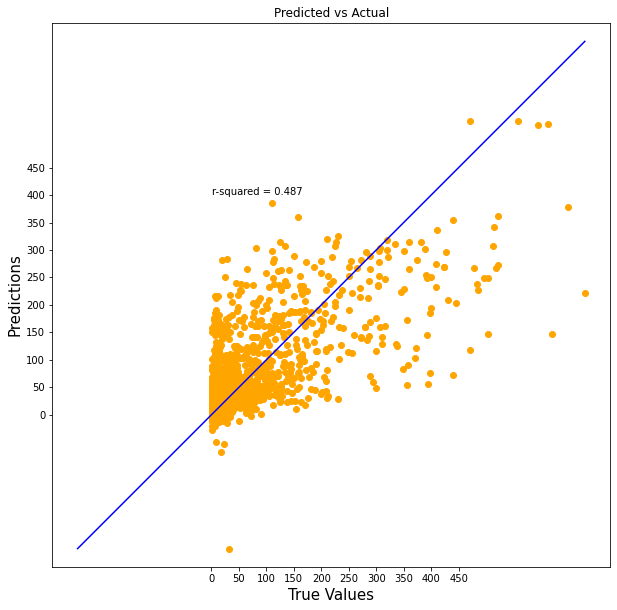

In [95]:
from sklearn.metrics import r2_score
true_value = Y
predicted_value = model.predict(X)

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='orange')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Predicted vs Actual')
plt.annotate("r-squared = {:.3f}".format(r2_score(true_value, predicted_value)), (1,400), )
plt.xticks( range(0,500,50) )
plt.yticks( range(0,500,50) )
plt.show()